In [1]:
import tensorflow as tf
import librosa
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Load the trained model
model = tf.keras.models.load_model('Models/spectrogram_best_model.keras')  

In [3]:


def preprocess_audio(audio_path, sr=22050, duration=2, n_mels=128, image_size=(600, 400)):
    # Load audio file
    audio, _ = librosa.load(audio_path, sr=sr, duration=duration, mono=True)

    # Convert audio to spectrogram
    spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=n_mels)
    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

    # Resize spectrogram to match the input shape of the model
    spectrogram = cv2.resize(spectrogram, dsize=image_size[::-1], interpolation=cv2.INTER_CUBIC)


    # Convert single-channel spectrogram to three-channel image
    spectrogram_rgb = np.stack((spectrogram,) * 3, axis=-1)




    return spectrogram_rgb[:, :, :3]


In [46]:
#audio_path = './test/Angry/7895_kz_japon.wav' 
#audio_path = './test/Calm/7895_sk_japon.wav' 
#audio_path = './test/Sad/7895_hl_japon.wav' 

#audio_path = './test/Angry/7895_kz_saf.wav'
#audio_path = './test/Calm/7895_sk_saf.wav'
#audio_path = './test/Happy/6783_mt_saf.wav'
#audio_path = './test/Sad/7895_hl_saf.wav'

#audio_path = './New Sound/angry_sira.ogg'
#audio_path = './New Sound/calm_sira.ogg'
#audio_path = './New Sound/happy_sira.ogg'
audio_path = './New Sound/sad_sira.ogg'


spectrogram = preprocess_audio(audio_path)

In [47]:
def normalize_spectrogram(spectrogram):
    # Normalize the spectrogram data
    normalized_spectrogram = ((spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram)) * 255).astype(np.uint8)
    return normalized_spectrogram

In [48]:
# Normalize the spectrogram
spectrogram = normalize_spectrogram(spectrogram)  # Function to normalize the spectrogram

In [49]:
# Define emotion labels mapping
emotion_labels = ['Angry', 'Calm', 'Happy', 'Sad']

In [50]:
# Predict the emotion category
try:
    predictions = model.predict(np.expand_dims(spectrogram, axis=0))
    predicted_label = emotion_labels[np.argmax(predictions)]
    print('Predicted Emotion:', predicted_label)
except Exception as e:
    print('Error during prediction:', e)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Emotion: Calm


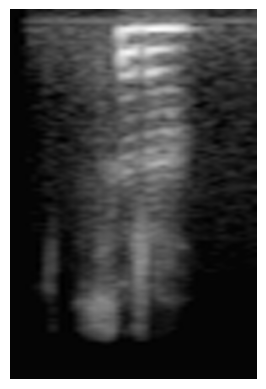

In [51]:
plt.imshow(spectrogram)
plt.axis('off')  # Turn off axis labels
plt.show()